In [26]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv('movieReplicationSet.csv')
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [28]:
df.columns[475]
# 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'

'Are you an only child? (1: Yes; 0: No; -1: Did not respond)'

In [29]:
only_child_col = df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']

In [30]:
only_child = only_child_col[only_child_col == 1].index
siblings = only_child_col[only_child_col == 0].index

In [31]:
only_child_movies = df['The Lion King (1994)'].iloc[only_child]
siblings_movies = df['The Lion King (1994)'].iloc[siblings]


In [32]:
t_stat, p_value = ttest_ind(only_child_movies, siblings_movies, nan_policy='omit')
p_value

0.04026705526268264

In [52]:
t_stat, p_value = ttest_ind(only_child_movies, siblings_movies, nan_policy='omit', alternative='greater')
p_value

0.9798664723686586

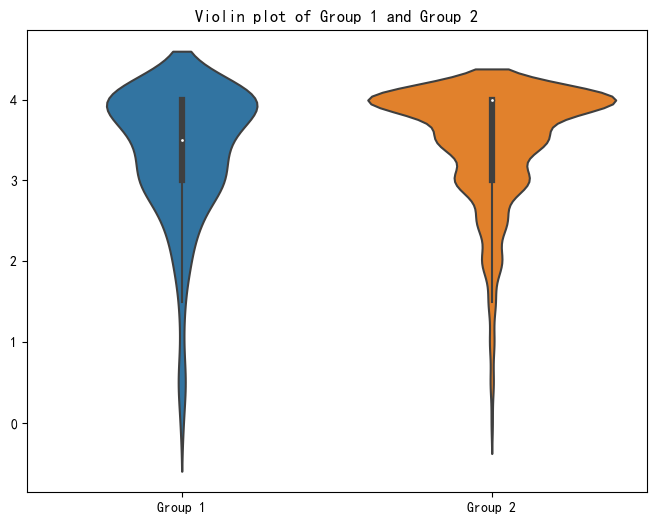

In [34]:
plt.figure(figsize=(8,6))
sns.violinplot(data=[only_child_movies, siblings_movies])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.title('Violin plot of Group 1 and Group 2')
plt.show()


In [35]:
import numpy as np
from scipy.stats import levene

# 生成两组模拟数据


# 执行 Levene's test
stat, p = levene(only_child_movies.dropna(), siblings_movies.dropna())

print(f"Levene's Test Statistic: {stat}")
print(f"P-Value: {p}")

if p < 0.005:
    print("Variances are significantly different")
else:
    print("Variances are not significantly different")

Levene's Test Statistic: 1.3208969311840386
P-Value: 0.25072822333565686
Variances are not significantly different


In [36]:
np.mean(only_child_movies.dropna())

3.347682119205298

In [37]:
np.mean(siblings_movies.dropna())

3.481958762886598

In [38]:
np.max(only_child_movies.dropna())

4.0

In [39]:
np.min(only_child_movies.dropna())

0.0

In [46]:
len(only_child_movies.dropna()[only_child_movies.dropna() == 4])/len(only_child_movies.dropna())

0.4370860927152318

In [47]:
len(siblings_movies.dropna()[siblings_movies.dropna() == 4])/len(siblings_movies.dropna())

0.5077319587628866

In [42]:
len(only_child_movies.dropna())

151

In [43]:
len(only_child_movies.dropna() == 4)

151

In [44]:
only_child_movies == 4

2        True
4        True
5        True
22      False
33      False
        ...  
1058    False
1068    False
1075     True
1076    False
1088    False
Name: The Lion King (1994), Length: 177, dtype: bool